C:\Users\jwcn9\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


,0,1
name,prosup,prosup
level,0,4
mean_acc_forearm_amp,2.08,1.25
mean_acc_wrist_amp,2.63,2.19
mean_gyr_forearm_amp,108.2,37.01
mean_gyr_wrist_amp,185.55,83.14
std_acc_forearm_amp,0.54,0.39
std_acc_wrist_amp,0.72,0.71
std_gyr_forearm_amp,30.43,11.27
std_gyr_wrist_amp,58.23,26.39


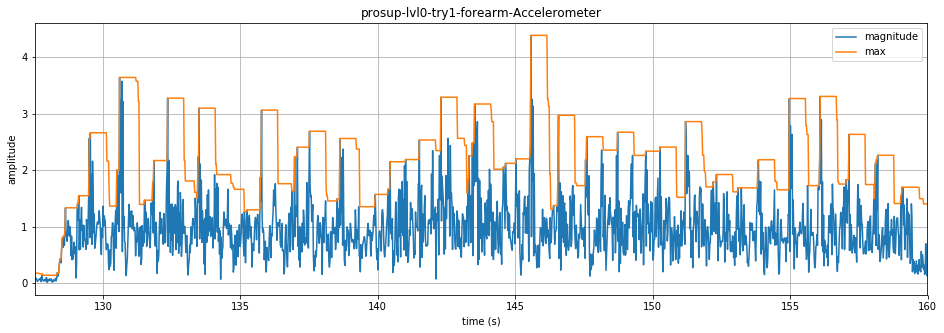

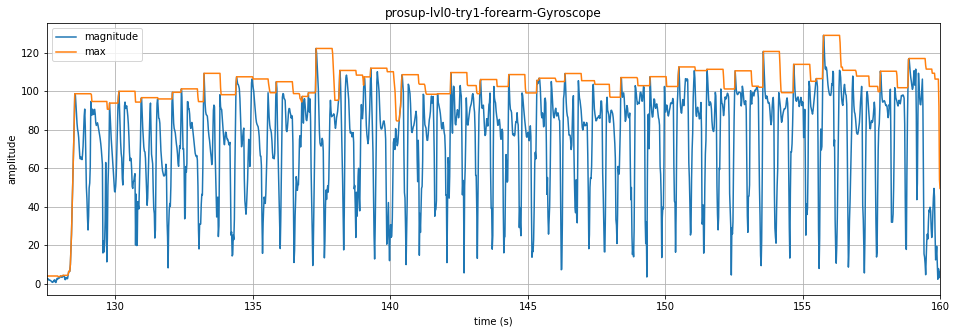

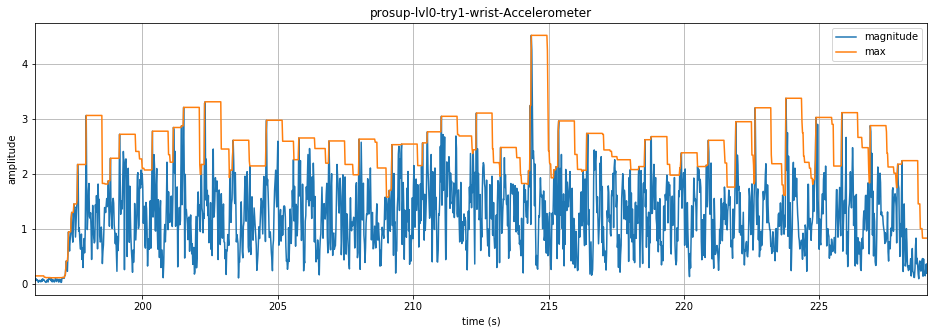

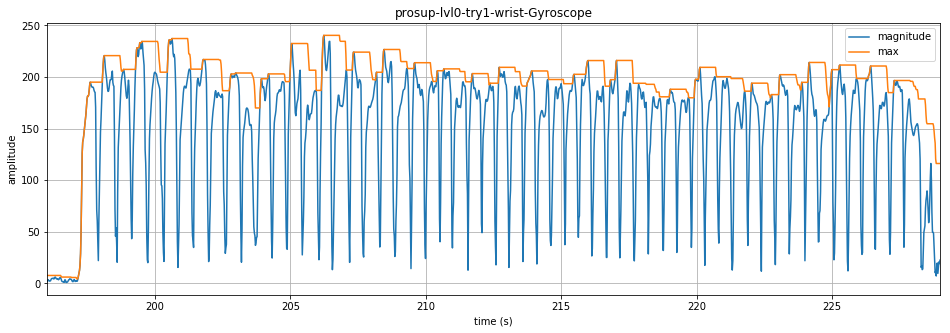

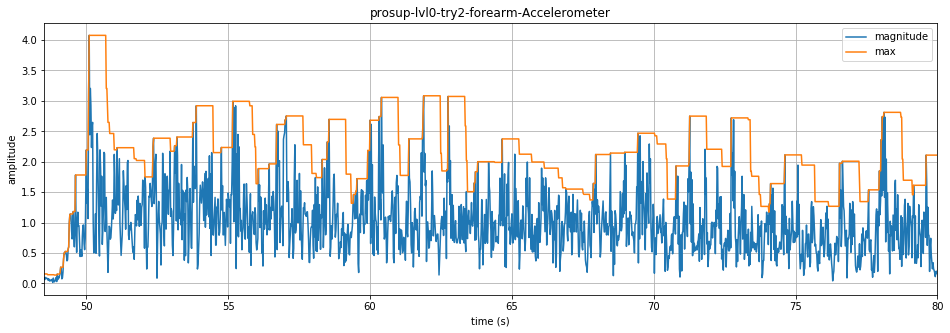

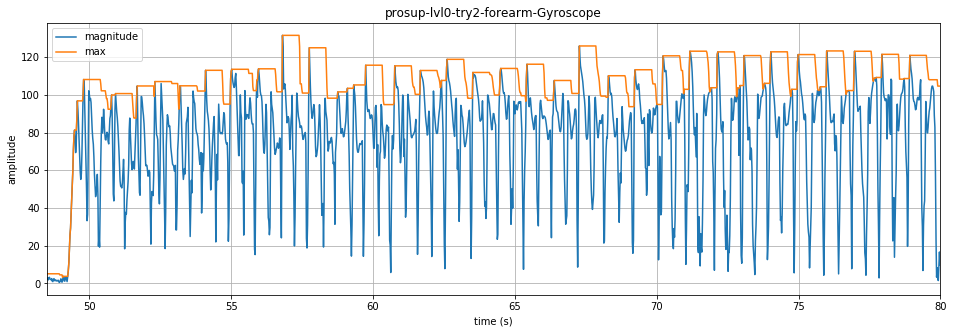

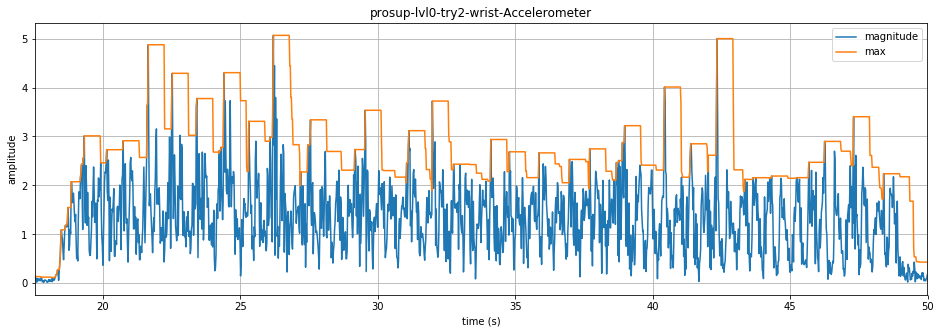

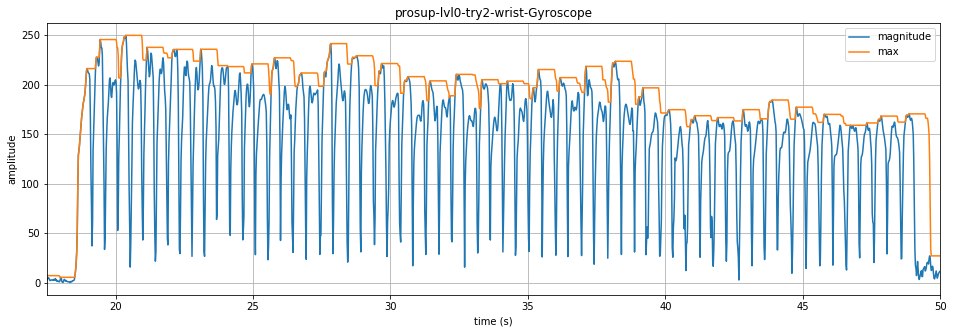

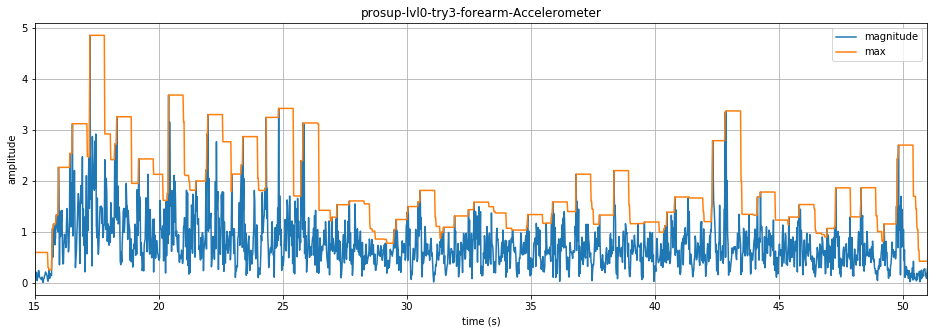

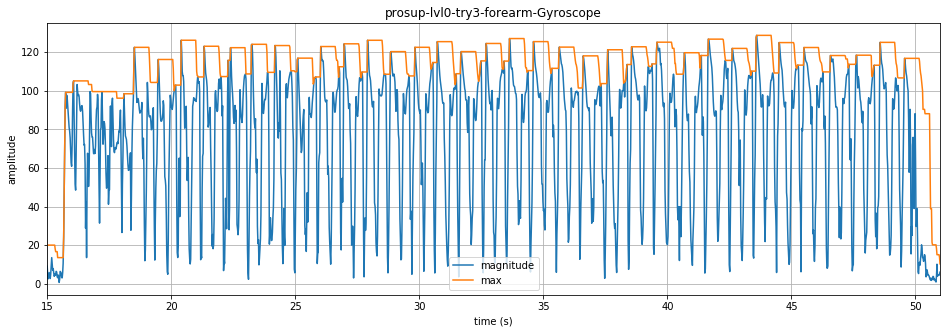

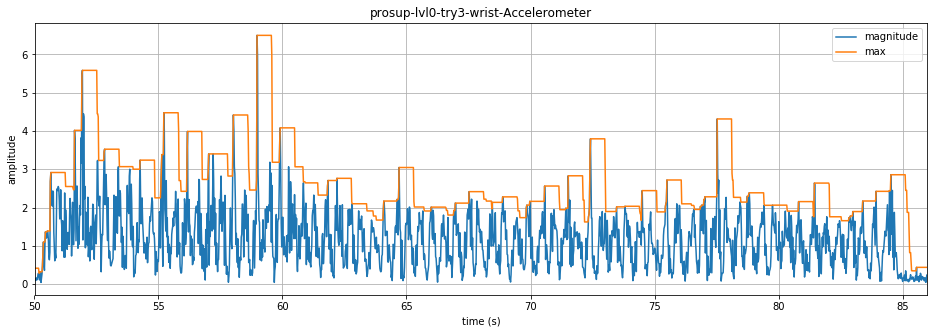

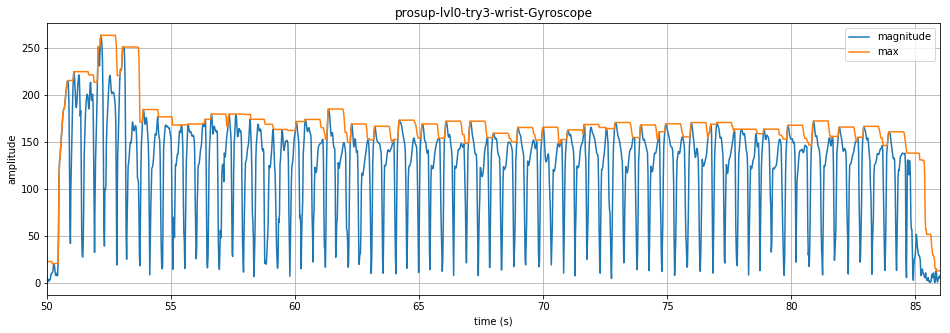

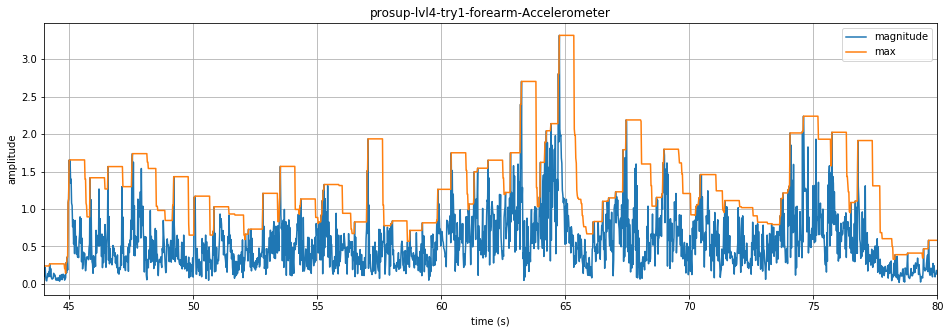

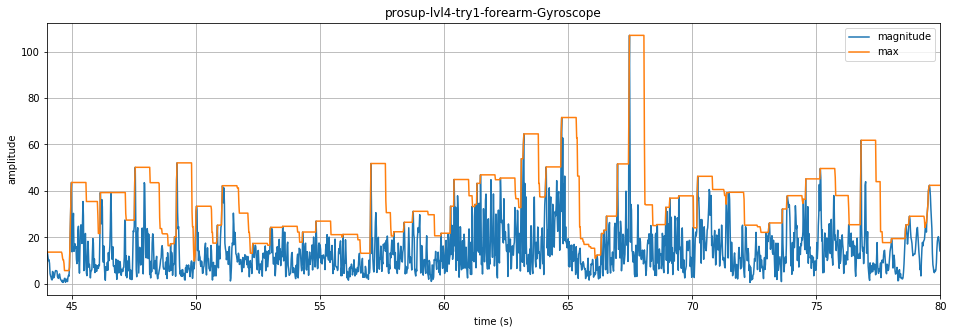

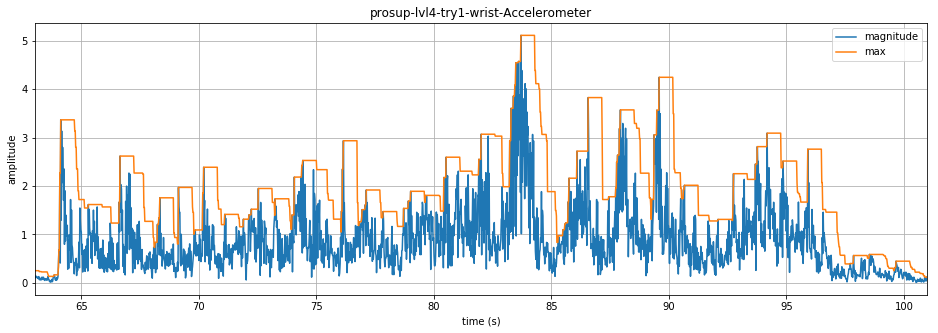

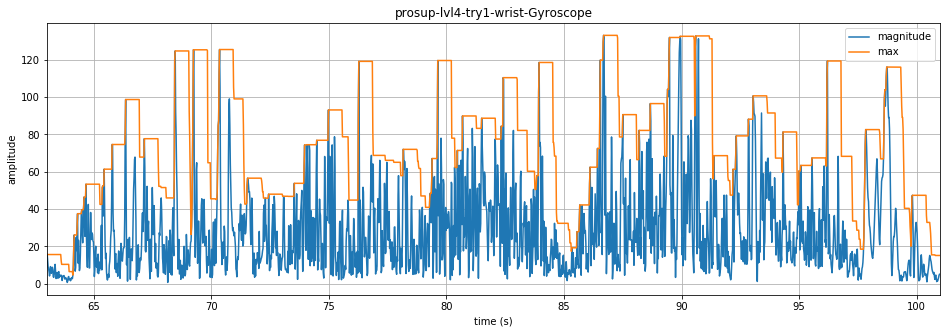

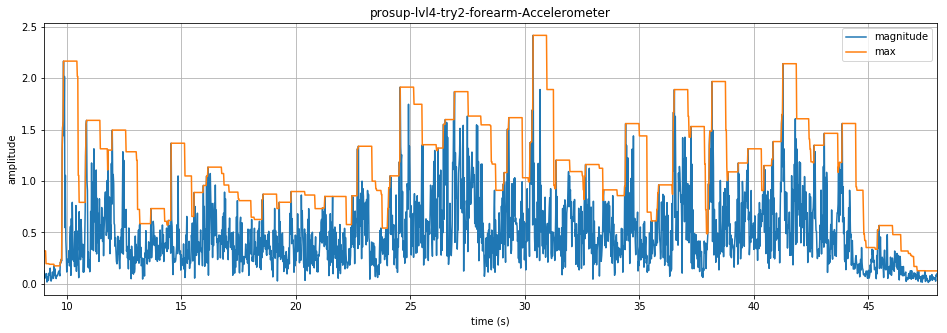

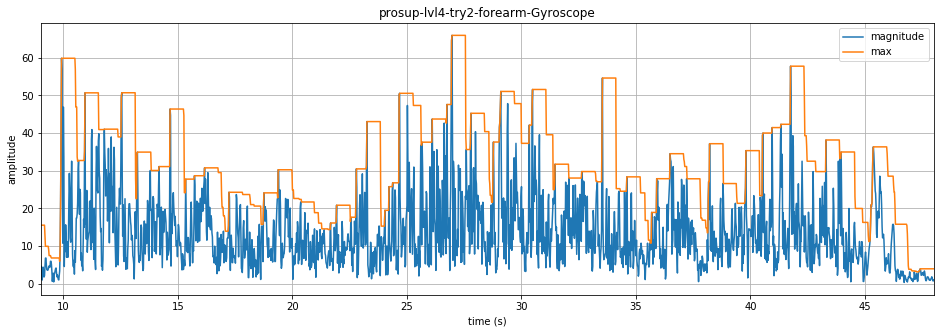

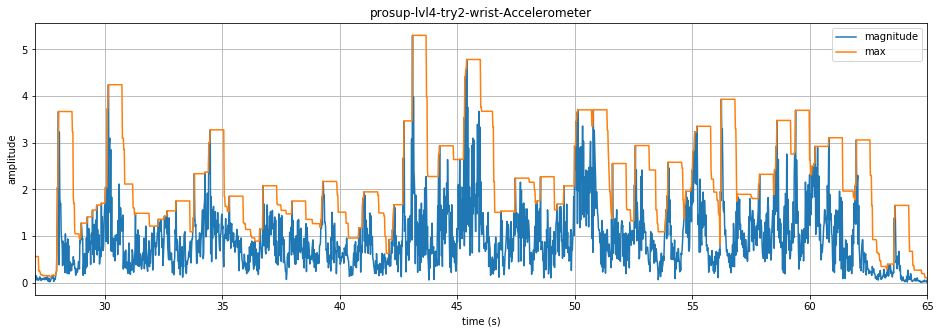

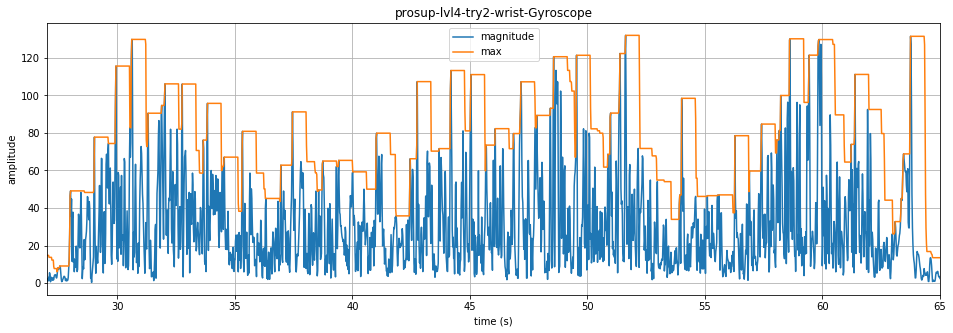

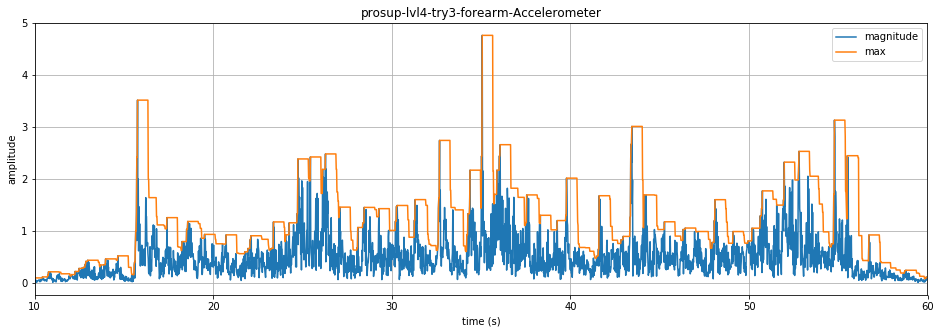

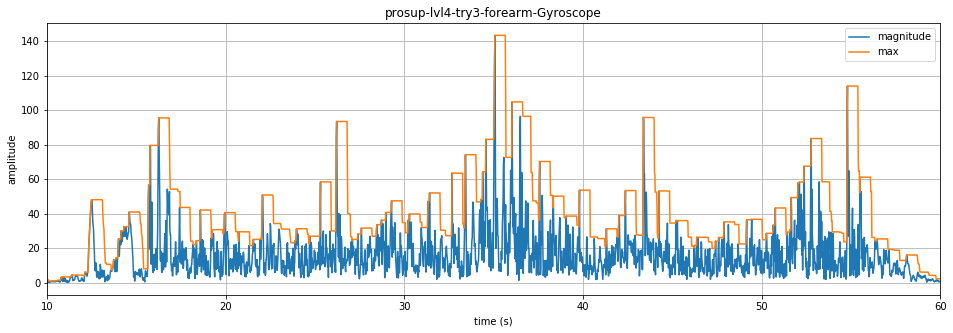

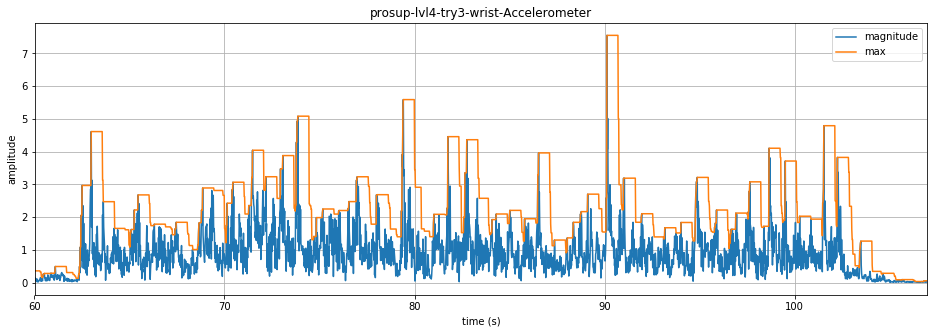

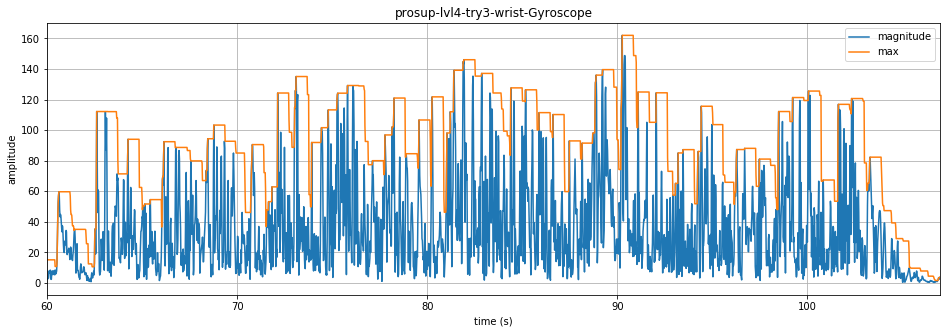

In [4]:
from os import listdir
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def cal_mean(c):
    # calculate mean of 3 different tries
    return np.around(np.add.reduceat(c, np.arange(0, len(c), 3))/3,3).round(2)

def plt_individual_graphs(df, df_, spectrogram, title):
    # plot magnitude graph
    ax1=df.plot(x='elapsed (s)',y=['magnitude','max'],
                grid=True,figsize=(16,5),
                title=title)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('amplitude')

#     # plot frequency over time
#     ax2=df_.plot(x='time',y='freq',
#              grid=True,figsize=(16,5),ylim=[0,15],
#              title=title)
#     ax2.set_xlabel('time (s)')
#     ax2.set_ylabel('frequency (Hz)')
    
#     # plot spectrogram
#     plt.figure(figsize=(16,5))
#     plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
#     plt.title(title)
#     plt.ylabel('Frequency band')
#     plt.xlabel('Time window')
#     plt.tight_layout()

# plot bubble graph for amplitude
def plt_bubble_amp(df, file, counter, axes):
    ax1,ax2,ax3,ax4 = axes
    if 'Accelerometer' in file:
        if 'forearm' in file:
            ax1.scatter(df.index[30:],np.ones(len(df.index[30:]))*counter[0],
                        c=df['max'][30:],cmap="Greens",
                        s=(df['max'][30:]*2.5**5.5).apply(int))
            counter[0]+=1
        elif 'wrist' in file:
            ax2.scatter(df.index[30:],np.ones(len(df.index[30:]))*counter[1],
                        c=df['max'][30:],cmap="Greens",
                        s=(df['max'][30:]*2.5**5.5).apply(int))
            counter[1]+=1
    elif 'Gyroscope' in file:
        if 'forearm' in file:
            ax3.scatter(df.index[30:],np.ones(len(df.index[30:]))*counter[2],
                        c=df['max'][30:],cmap="Greens",
                        s=(df['max'][30:]**1.7).apply(int))
            counter[2]+=1
        elif 'wrist' in file:
            ax4.scatter(df.index[30:],np.ones(len(df.index[30:]))*counter[3],
                        c=df['max'][30:],cmap="Greens",
                        s=(df['max'][30:]**1.7).apply(int))
            counter[3]+=1
            
    return counter

# plot bubble graph for frequency
def plt_bubble_freq(df_, file, counter, axes):
    if 'Accelerometer' in file:
        if 'forearm' in file:
            ax1.scatter(df_['time'][30:],np.ones(len(df_.index[30:]))*counter[0],
                        c=df_['max'][30:],cmap="Greens",
                        s=(df_['max'][30:]**2.3).apply(int))
            counter[0]+=1
        elif 'wrist' in file:
            ax2.scatter(df_['time'][30:],np.ones(len(df_.index[30:]))*counter[1],
                        c=df_['max'][30:],cmap="Greens",
                        s=(df_['max'][30:]**2.3).apply(int))
            counter[1]+=1
    elif 'Gyroscope' in file:
        if 'forearm' in file:
            ax3.scatter(df_['time'][30:],np.ones(len(df_.index[30:]))*counter[2],
                        c=df_['max'][30:],cmap="Greens",
                        s=(df_['max'][30:]**2.3).apply(int))
            counter[2]+=1
        elif 'wrist' in file:
            ax4.scatter(df_['time'][30:],np.ones(len(df_.index[30:]))*counter[3],
                        c=df_['max'][30:],cmap="Greens",
                        s=(df_['max'][30:]**2.3).apply(int))
            counter[3]+=1
            
    return counter

def cal_magnitude(df, file, window):
    # combine triaxial data into one singular magnitude data
    if 'Accelerometer' in file:
        df['x'] = df.loc[window-1:,'x-axis (g)']-df['x-axis (g)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (g)']-df['y-axis (g)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (g)']-df['z-axis (g)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = (df['magnitude'].apply(math.sqrt))*9.81
        
    elif 'Gyroscope' in file:
        df['x'] = df.loc[window-1:,'x-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = df['magnitude'].apply(math.sqrt)
        
    return df

# repivot dataframe
def rearrange_stats_table(info):
    info['name'] = info['test'].apply(lambda x:x.split('-')[0])
    info['level'] = info['test'].apply(lambda x:x.split('-')[1])
    info['try'] = info['test'].apply(lambda x:x.split('-')[2])

    info = pd.DataFrame({'name': info['name'].iloc[::2].values,
                         'level': info['level'].iloc[::2].apply(lambda x:int(x[-1])).values,
                         'try': info['try'].iloc[::2].apply(lambda x:int(x[-1])).values,
                         'mean_accel_amp': info['mean_amp'].iloc[::2].values,
                         'mean_gyro_amp': info['mean_amp'].iloc[1::2].values,
                         'std_accel_amp': info['std_amp'].iloc[::2].values,
                         'std_gyro_amp': info['std_amp'].iloc[1::2].values,
                         'mean_accel_freq': info['mean_freq'].iloc[::2].values,
                         'mean_gyro_freq': info['mean_freq'].iloc[1::2].values,
                         'std_accel_freq': info['std_freq'].iloc[::2].values,
                         'std_gyro_freq': info['std_freq'].iloc[1::2].values})

    info = pd.DataFrame({'name': info['name'].iloc[::6].values,
                         'level': info['level'].iloc[::6].values,
                         'mean_acc_forearm_amp': cal_mean(info['mean_accel_amp'].iloc[::2].values),
                         'mean_acc_wrist_amp': cal_mean(info['mean_accel_amp'].iloc[1::2].values),
                         'mean_gyr_forearm_amp': cal_mean(info['mean_gyro_amp'].iloc[::2].values),
                         'mean_gyr_wrist_amp': cal_mean(info['mean_gyro_amp'].iloc[1::2].values),
                         'std_acc_forearm_amp': cal_mean(info['std_accel_amp'].iloc[::2].values),
                         'std_acc_wrist_amp': cal_mean(info['std_accel_amp'].iloc[1::2].values),
                         'std_gyr_forearm_amp': cal_mean(info['std_gyro_amp'].iloc[::2].values),
                         'std_gyr_wrist_amp': cal_mean(info['std_gyro_amp'].iloc[1::2].values),
                         'mean_acc_forearm_freq': cal_mean(info['mean_accel_freq'].iloc[::2].values),
                         'mean_acc_wrist_freq': cal_mean(info['mean_accel_freq'].iloc[1::2].values),
                         'mean_gyr_forearm_freq': cal_mean(info['mean_gyro_freq'].iloc[::2].values),
                         'mean_gyr_wrist_freq': cal_mean(info['mean_gyro_freq'].iloc[1::2].values),
                         'std_acc_forearm_freq': cal_mean(info['std_accel_freq'].iloc[::2].values),
                         'std_acc_wrist_freq': cal_mean(info['std_accel_freq'].iloc[1::2].values),
                         'std_gyr_forearm_freq': cal_mean(info['std_gyro_freq'].iloc[::2].values),
                         'std_gyr_wrist_freq': cal_mean(info['std_gyro_freq'].iloc[1::2].values)})
    
    return info

# MAIN FUNCTION
def main(path='/', window=3, truncate=None, info=None, counter=[0,0,0,0], axes=[]):
    filenames = [filename for filename in listdir(path) if filename.endswith('.csv')]
    
    for i in range(len(filenames)):
        file = filenames[i]
        title = file.split('_')[0]

        # extract dataframe
        df = pd.read_csv(path + file)

        # combine triaxial data into one singular magnitude data
        df = cal_magnitude(df, file, window)
        
        # extract umbrella curve
        df['max'] = df['magnitude'].rolling(30).max()

        # truncate signal beyond start and end times
        if truncate is not None:
            df = df[(df['elapsed (s)'] <= truncate[i][1]) & (df['elapsed (s)'] >= truncate[i][0])]
            df.reset_index(inplace=True)
        
        # calculate rolling frequency
        freqs, times, spectrogram = signal.spectrogram(df['magnitude'].values, fs=50.0, nperseg=70, noverlap=70-1)
        df_ = pd.DataFrame({'time':times, 'freq':[freqs[i] for i in np.argmax(spectrogram,0)]})
        df_['max'] = df_['freq'].rolling(30).max()

        # gather information on amplitude
        stats = df.describe().loc[:,['max','magnitude']].T
        # gather information on frequency
        stats_ = df_.describe().loc[:,['max','freq']].T
        
        # append into dataframe
        info = info.append({
            'test': title,
            'mean_amp': stats['mean'][0],
            'std_amp': stats['std'][1],
            'mean_freq': stats_['mean'][0],
            'std_freq': stats_['std'][1]
        }, ignore_index=True)
        
#         # ONLY UNCOMMENT WHEN PLOTTING GRAPHS
        plt_individual_graphs(df, df_, spectrogram, title+'-'+file.split('_')[4])
#         counter = plt_bubble_amp(df, file, counter, axes)
#         counter = plt_bubble_freq(df_, file, counter, axes)
    
    info = rearrange_stats_table(info)
    
    return info, axes


info = pd.DataFrame(columns=['test','mean','std'])

# # HANDGRIP
# # # ONLY UNCOMMENT WHEN PLOTTING GRAPHS
# # ratio = (20,6)
# # fig1, ax1 = plt.subplots(figsize=ratio)
# # fig2, ax2 = plt.subplots(figsize=ratio)
# # fig3, ax3 = plt.subplots(figsize=ratio)
# # fig4, ax4 = plt.subplots(figsize=ratio)
# truncate = [(80,107),(80,107),(12.5,39.5),(12.5,39.5),(10,42),(10,42),(46,78),(46,78),(52,92),(52,92),(30,70),(30,70),
#             (50,105),(50,105),(14,69),(14,69),(13,68),(13,68),(70,125),(70,125),(33.5,68.5),(33.5,68.5),(5,40),(5,40)]
# info, axes = main(path='handgrip_experiment/',
#                   window=3,
#                   truncate=[(80,107),(80,107),(12.5,39.5),(12.5,39.5),(10,42),(10,42),(46,78),(46,78),(52,92),(52,92),(30,70),(30,70),
#                             (50,105),(50,105),(14,69),(14,69),(13,68),(13,68),(70,125),(70,125),(33.5,68.5),(33.5,68.5),(5,40),(5,40)],
#                   info=info,
#                   counter=[0,0,0,0])

# PRONATION AND SUPINATION
# # ONLY UNCOMMENT WHEN PLOTTING GRAPHS
# ratio = (20,6)
# fig1, ax1 = plt.subplots(figsize=ratio)
# fig2, ax2 = plt.subplots(figsize=ratio)
# fig3, ax3 = plt.subplots(figsize=ratio)
# fig4, ax4 = plt.subplots(figsize=ratio)
info, axes = main(path='pronationsupination_experiment/',
                  window=3,
                  truncate=[(127.5,160),(127.5,160),(196,229),(196,229),(48.5,80),(48.5,80),(17.5,50),(17.5,50),(15,51),(15,51),(50,86),(50,86),
                            (44,80),(44,80),(63,101),(63,101),(9,48),(9,48),(27,65),(27,65),(10,60),(10,60),(60,107),(60,107)],
                  info=info,
                  counter=[0,0,0,0])

for ax in axes:
    ax.yaxis.set_ticks(np.arange(0,6,1))
    ax.set_yticklabels(np.array(['lvl0_try1','lvl0_try2','lvl0_try3','lvl4_try1','lvl4_try2','lvl4_try3']), fontdict={'fontsize':15})

# ax1.set_title('Accelerometer Amplitude for Forearm', {'fontsize': 18})
# ax2.set_title('Accelerometer Amplitude for Wrist', {'fontsize': 18})
# ax3.set_title('Gyroscope Amplitude for Forearm', {'fontsize': 18})
# ax4.set_title('Gyroscope Amplitude for Wrist', {'fontsize': 18})

info.T